In [10]:
import pandas as pd
data = pd.read_csv('HW11-ClusteringData.csv', header=None)
X = data.iloc[:,0:2].values   # N x 2 array of coordinates
true_labels = data.iloc[:,2].values

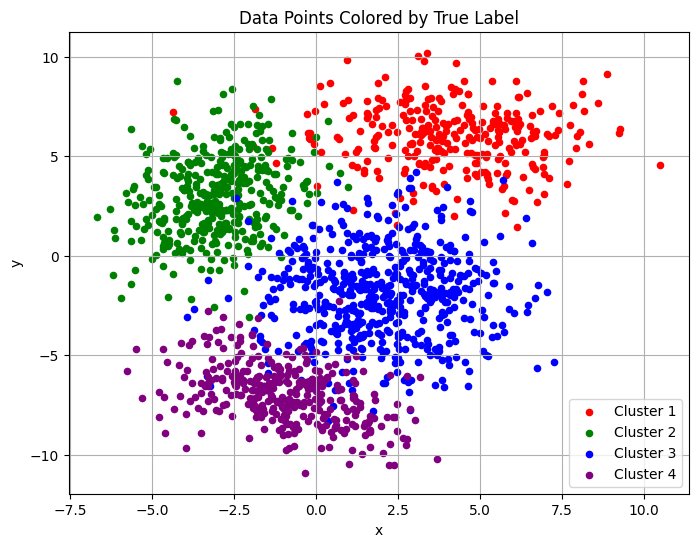

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Assume true_labels takes values in {1, 2, 3, 4}
plt.figure(figsize=(8,6))
colors = ['red', 'green', 'blue', 'purple']
for k in range(1,5):
    mask = (true_labels == k)
    plt.scatter(X[mask,0], X[mask,1], c=colors[k-1], label=f'Cluster {k}', s=20)

plt.title('Data Points Colored by True Label')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Range of k values:
k_values = range(2, 8)  # 2 through 7
euclidean_silhouettes = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    # Compute silhouette score (default: Euclidean distance)
    score = silhouette_score(X, cluster_labels, metric='euclidean')
    euclidean_silhouettes.append(score)


In [13]:
manhattan_silhouettes = []

for k in k_values:
    # cluster_labels already obtained above
    # Re-run or reuse if needed:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    # Compute silhouette with Manhattan distance
    score = silhouette_score(X, cluster_labels, metric='manhattan')
    manhattan_silhouettes.append(score)


In [14]:
print("Euclidean Silhouettes: ", list(zip(k_values, euclidean_silhouettes)))
print("Manhattan Silhouettes: ", list(zip(k_values, manhattan_silhouettes)))

Euclidean Silhouettes:  [(2, 0.45337462381747445), (3, 0.48145308529702574), (4, 0.5028733233129721), (5, 0.4452643673929825), (6, 0.4078947769915544), (7, 0.361453109528524)]
Manhattan Silhouettes:  [(2, 0.4500158733085307), (3, 0.4685229360383401), (4, 0.5049235319766173), (5, 0.4408477297146234), (6, 0.40748336203861646), (7, 0.36236594206003386)]


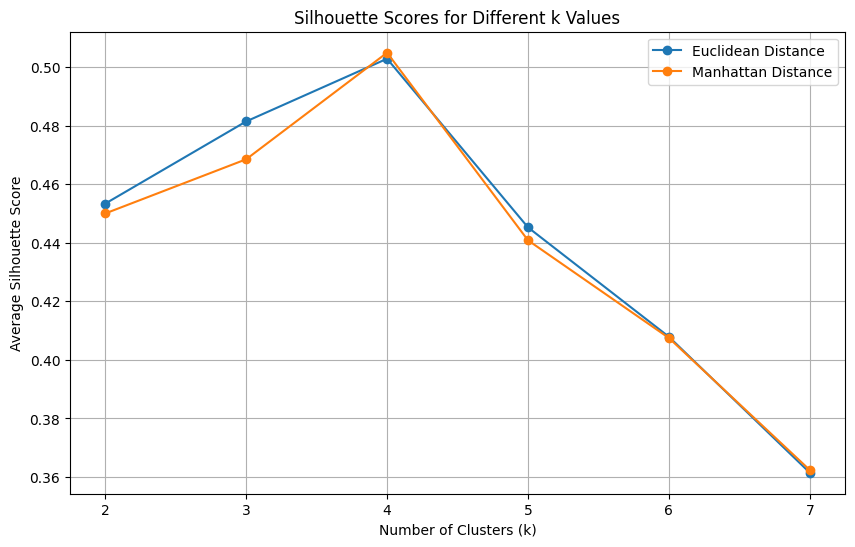

In [15]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, euclidean_silhouettes, label='Euclidean Distance', marker='o')
plt.plot(k_values, manhattan_silhouettes, label='Manhattan Distance', marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Scores for Different k Values')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
from sklearn.mixture import GaussianMixture

for K in [1, 2, 3]:
    gmm = GaussianMixture(n_components=K, random_state=42)
    gmm.fit(X)
    estimated_means = gmm.means_
    estimated_weights = gmm.weights_
    print(f"For K={K}:")
    print("Estimated mixing proportions: ", estimated_weights)
    print("Estimated means: ", estimated_means)
    print()


For K=1:
Estimated mixing proportions:  [1.]
Estimated means:  [[ 0.487239   -0.31368064]]

For K=2:
Estimated mixing proportions:  [0.47257479 0.52742521]
Estimated means:  [[ 0.12667755  4.03538008]
 [ 0.81030329 -4.21045384]]

For K=3:
Estimated mixing proportions:  [0.25311793 0.56576299 0.18111908]
Estimated means:  [[-2.97304225  3.0223642 ]
 [ 0.86031453 -3.83184082]
 [ 4.15768004  6.01382543]]



In [17]:
K=4
gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(X)
est_means = gmm.means_
est_weights = gmm.weights_

print("True mixing proportions:", [0.1875, 0.25, 0.3438, 0.2188])
print("Estimated mixing proportions:", est_weights)
print("True means:\n", np.array([[4,6],[-3,3],[2,-2],[-1,-7]]))
print("Estimated means:\n", est_means)


True mixing proportions: [0.1875, 0.25, 0.3438, 0.2188]
Estimated mixing proportions: [0.2523972  0.23571008 0.1892817  0.32261102]
True means:
 [[ 4  6]
 [-3  3]
 [ 2 -2]
 [-1 -7]]
Estimated means:
 [[-2.99590478  3.0123362 ]
 [-0.89940114 -6.81850633]
 [ 4.19088986  5.90086652]
 [ 2.05242876 -1.80936552]]


TypeError: Ellipse.__init__() takes 4 positional arguments but 5 were given

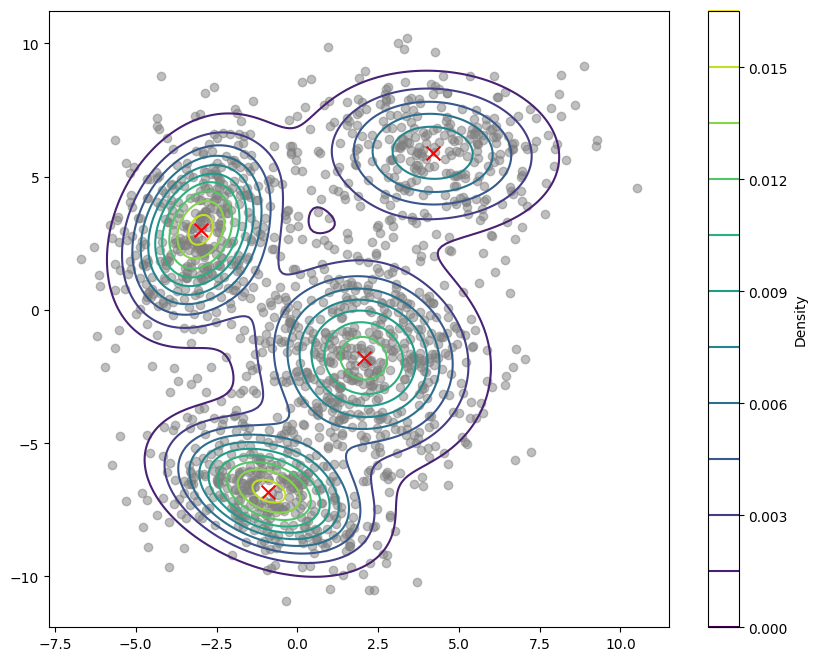

In [20]:
import matplotlib as mpl
from matplotlib.patches import Ellipse
# 1. Plot the data points
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.5, label='Data Points')

# 2. Create a grid of points over the range of the data
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# 3. Evaluate the GMM density on the grid
# The GMM provides a method 'score_samples' that returns the log probability of the data
grid_points = np.column_stack([xx.ravel(), yy.ravel()])
log_density = gmm.score_samples(grid_points)
density = np.exp(log_density)
density = density.reshape(xx.shape)

# 4. Plot the contour lines for the GMM PDF
contour = plt.contour(xx, yy, density, levels=10, cmap='viridis')
plt.colorbar(contour, label='Density')

# 5. Overlay the estimated means
plt.scatter(est_means[:, 0], est_means[:, 1], c='red',
            label='Estimated Means', marker='x', s=100)

# If you also want to draw ellipses representing the covariance of each component:
for i in range(gmm.n_components):
    mean = gmm.means_[i]
    cov = gmm.covariances_[i]

    # Compute eigenvalues and eigenvectors
    eigenvals, eigenvecs = np.linalg.eigh(cov)
    # Calculate angle for the ellipse
    angle = np.degrees(np.arctan2(*eigenvecs[:,0][::-1]))
    # Width and height of the ellipse
    width, height = 2 * np.sqrt(eigenvals)
    ellipse = Ellipse(mean, width, height, angle, edgecolor='black', facecolor='none', lw=2)
    plt.gca().add_patch(ellipse)

# 6. Final plot customization
plt.title('GMM Contour Plot with Estimated Means and Covariance Ellipses')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.grid(True)
plt.show()
